In [13]:
import pandas as pd
drive_root = "data/"
filename = "groceries.csv"
data = pd.read_csv(drive_root+"processed"+filename)
data

FileNotFoundError: [Errno 2] No such file or directory: 'data/processedgroceries.csv'

# New Section

In [2]:
import ast

# Convert the string to a list of lists
dataset = [ast.literal_eval(string) for string in data["itemDescription"]]
dataset[:10]
all_items = [item for sublist in dataset for item in sublist]

# Count the number of unique items
num_unique = len(set(all_items))

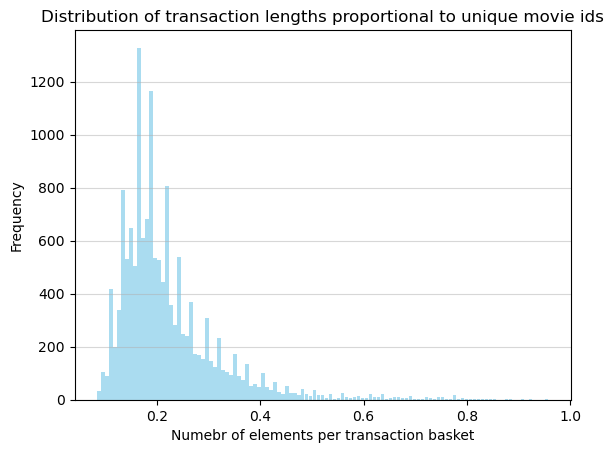

In [4]:
import matplotlib.pyplot as plt
# Calculate the lengths of elements in the column
lengths = data['itemDescription'].apply(len) / num_unique

# Plotting the histogram of lengths
plt.hist(lengths, bins='auto', color='skyblue', alpha=0.7, rwidth=0.85)
plt.xlabel('Numebr of elements per transaction basket')
plt.ylabel('Frequency')
plt.title('Distribution of transaction lengths proportional to unique movie ids')
plt.grid(axis='y', alpha=0.5)
plt.show()

In [5]:
import pandas as pd
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

### alternatively:
min_supports = [0.01, 0.05, 0.1, 0.2]
frequent_itemsets_list = {}
for ms in min_supports:
    start_time = time.time()
    # apdf = apriori(df, min_support=ms, use_colnames=True)
    apdf = fpgrowth(df, min_support=ms, use_colnames=True)
    apdf["itemsets"] = apdf["itemsets"].apply(lambda x: list(x))
    frequent_itemsets_list[ms] = {
        'frequent_itemsets': apdf,
        'execution_time': time.time() - start_time
    }
frequent_itemsets_list

{0.01: {'frequent_itemsets':      support                        itemsets
  0   0.157923                    [whole milk]
  1   0.085879                        [yogurt]
  2   0.060349                       [sausage]
  3   0.051728                        [pastry]
  4   0.018780                   [salty snack]
  ..       ...                             ...
  64  0.011161            [yogurt, whole milk]
  65  0.011629              [soda, whole milk]
  66  0.013968        [rolls/buns, whole milk]
  67  0.010559  [rolls/buns, other vegetables]
  68  0.014837  [other vegetables, whole milk]
  
  [69 rows x 2 columns],
  'execution_time': 0.14722847938537598},
 0.05: {'frequent_itemsets':      support            itemsets
  0   0.157923        [whole milk]
  1   0.085879            [yogurt]
  2   0.060349           [sausage]
  3   0.051728            [pastry]
  4   0.097106              [soda]
  5   0.110005        [rolls/buns]
  6   0.122101  [other vegetables]
  7   0.067767    [tropical frui

In [6]:
frequent_itemsets_list[0.01]

{'frequent_itemsets':      support                        itemsets
 0   0.157923                    [whole milk]
 1   0.085879                        [yogurt]
 2   0.060349                       [sausage]
 3   0.051728                        [pastry]
 4   0.018780                   [salty snack]
 ..       ...                             ...
 64  0.011161            [yogurt, whole milk]
 65  0.011629              [soda, whole milk]
 66  0.013968        [rolls/buns, whole milk]
 67  0.010559  [rolls/buns, other vegetables]
 68  0.014837  [other vegetables, whole milk]
 
 [69 rows x 2 columns],
 'execution_time': 0.14722847938537598}

In [9]:
from mlxtend.frequent_patterns import association_rules
ar_list = {}
for key, frequent_itemsets in frequent_itemsets_list.items():
    if frequent_itemsets["frequent_itemsets"].empty:
        ar_list[key] = pd.DataFrame()
        continue
    ar_list[key] = association_rules(frequent_itemsets["frequent_itemsets"], metric="confidence", min_threshold=0.7)

In [10]:
ar_list

{0.01: Empty DataFrame
 Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
 Index: [],
 0.05: Empty DataFrame
 Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
 Index: [],
 0.1: Empty DataFrame
 Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, leverage, conviction, zhangs_metric]
 Index: [],
 0.2: Empty DataFrame
 Columns: []
 Index: []}